<a href="https://colab.research.google.com/github/DiegoDuran03/1/blob/main/Clase9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='https://raw.githubusercontent.com/tec03/Datasets/main/datasets/reg_data.csv'

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv(path)
df.head()

,Gender,Salary,Age,Place,Weight,Company,Education,JoinYear
0,Female,1300.0,35.0,1.0,80.0,BMW,Bachelor,2008
1,Female,1250.0,33.0,1.0,82.5,Ford,HighSchool,2010
2,Male,2200.0,34.0,2.0,100.8,BMW,Bachelor,2004
3,Male,2100.0,42.0,2.0,90.0,BMW,Master,2000
4,Female,1500.0,29.0,1.0,67.0,Ford,Master,2010


##What is the salary of a person with age 33?

Salary=b0+b1*Age

In [ ]:
favs=['Age','Salary']
ndf=df[favs].dropna()
ndf.isnull().any()

,0
Age,False
Salary,False


In [ ]:
ndf

,Age,Salary
0,35.0,1300.0
1,33.0,1250.0
2,34.0,2200.0
3,42.0,2100.0
4,29.0,1500.0
5,42.0,1700.0
6,50.0,3000.0
7,55.0,3000.0
8,31.0,2800.0
9,46.0,2900.0


In [ ]:
import statsmodels.api as sm
from sklearn import linear_model

In [ ]:
x=pd.DataFrame(ndf.Age)
y=ndf.Salary

In [ ]:
lm=linear_model.LinearRegression()
model_lm=lm.fit(x,y)
model_lm

LinearRegression()

In [ ]:
model_lm.coef_

array([41.96351675])

In [ ]:
model_lm.intercept_

606.3450956937793

In [ ]:
model_lm.score(x,y)

0.31711161647425

In [ ]:
age_val=float(input('Enter the age of the person to calculate salary:'))

Enter the age of the person to calculate salary:33


In [ ]:
print(f'Salary of the person with age {age_val} is',model_lm.intercept_ + model_lm.coef_*age_val)

Salary of the person with age 33.0 is [1991.14114833]


##Method 2

In [ ]:
modelA=sm.OLS.from_formula('Salary~Age',data=ndf)
resultA=modelA.fit()
summary = resultA.summary()
summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     6.966
Date:                Tue, 03 Sep 2024   Prob (F-statistic):             0.0186
Time:                        15:43:00   Log-Likelihood:                -128.66
No. Observations:                  17   AIC:                             261.3
Df Residuals:                      15   BIC:                             263.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    606.3451    674.058      0.900      0.383    -830.376    2043.066
Age           41.9635     15.900      2.639      0.019       8.074      75.853
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.315
Skew:                           0.084   Prob(JB):                        0.854
Kurtosis:                       2.354   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
params=resultA.params
Intercept=params['Intercept']
age_coef=params['Age']

In [ ]:
age_coef

41.963516746411486

In [ ]:
Intercept

606.3450956937797

In [ ]:
print(f'Salary of a person with age {age_val} is \t:',Intercept+age_coef*age_val)

Salary of a person with age 33.0 is 	: 1991.1411483253587


In [ ]:
resi=modelA.fit().resid
resi

,0
0,-775.068182
1,-741.141148
2,166.895335
3,-268.812799
4,-323.287081
5,-668.812799
6,295.479067
7,85.661483
8,892.785885
9,363.333134


In [ ]:
reg_vals=resultA.fittedvalues.to_frame()
reg_vals

,0
0,2075.068182
1,1991.141148
2,2033.104665
3,2368.812799
4,1823.287081
5,2368.812799
6,2704.520933
7,2914.338517
8,1907.214115
9,2536.666866


In [ ]:
study=[ndf['Salary'],ndf['Age'],resi,reg_vals]
study

[0     1300.0
 1     1250.0
 2     2200.0
 3     2100.0
 4     1500.0
 5     1700.0
 6     3000.0
 7     3000.0
 8     2800.0
 9     2900.0
 10    2780.0
 11    2550.0
 14    2780.0
 15    2550.0
 16    2550.0
 17    2550.0
 18    2550.0
 Name: Salary, dtype: float64,
 0     35.0
 1     33.0
 2     34.0
 3     42.0
 4     29.0
 5     42.0
 6     50.0
 7     55.0
 8     31.0
 9     46.0
 10    36.0
 11    48.0
 14    36.0
 15    48.0
 16    48.0
 17    48.0
 18    48.0
 Name: Age, dtype: float64,
 0    -775.068182
 1    -741.141148
 2     166.895335
 3    -268.812799
 4    -323.287081
 5    -668.812799
 6     295.479067
 7      85.661483
 8     892.785885
 9     363.333134
 10    662.968301
 11    -70.593900
 14    662.968301
 15    -70.593900
 16    -70.593900
 17    -70.593900
 18    -70.593900
 dtype: float64,
               0
 0   2075.068182
 1   1991.141148
 2   2033.104665
 3   2368.812799
 4   1823.287081
 5   2368.812799
 6   2704.520933
 7   2914.338517
 8   1907.214115
 9   2

In [ ]:
type(study)

list

In [ ]:
study_table=pd.concat(study,axis=1)
study_table

,Salary,Age,0,0
0,1300.0,35.0,-775.068182,2075.068182
1,1250.0,33.0,-741.141148,1991.141148
2,2200.0,34.0,166.895335,2033.104665
3,2100.0,42.0,-268.812799,2368.812799
4,1500.0,29.0,-323.287081,1823.287081
5,1700.0,42.0,-668.812799,2368.812799
6,3000.0,50.0,295.479067,2704.520933
7,3000.0,55.0,85.661483,2914.338517
8,2800.0,31.0,892.785885,1907.214115
9,2900.0,46.0,363.333134,2536.666866


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

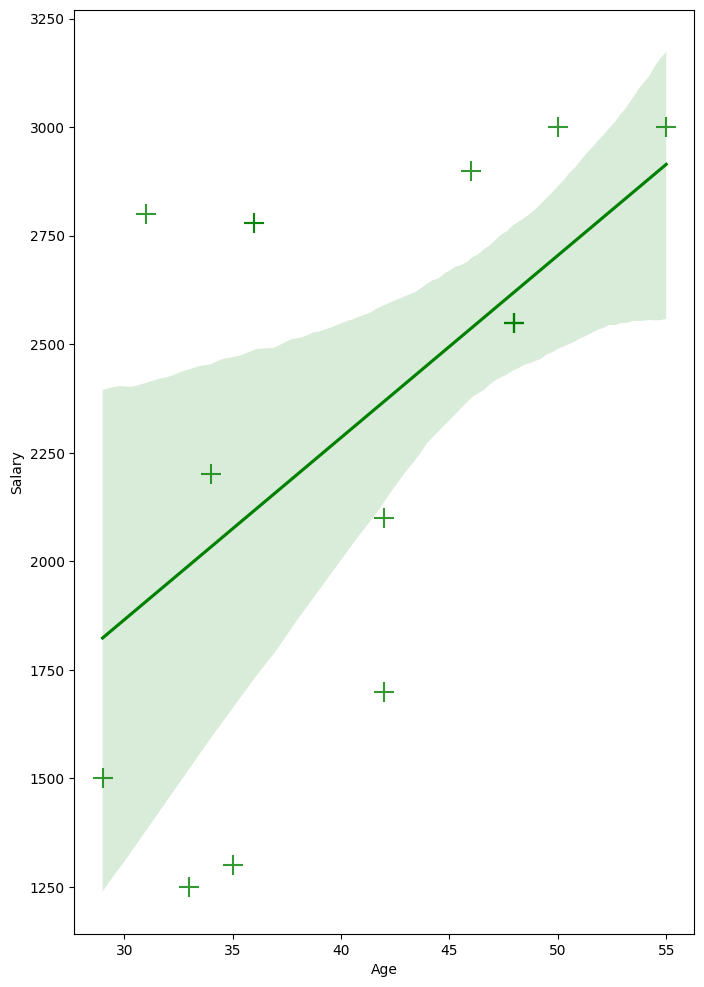

In [ ]:
plt.figure(figsize=(8,12))
ax=sns.regplot(x='Age',
               y='Salary',
               data=study_table,
               color='green',
               marker='+',
               scatter_kws={'s':200})

In [ ]:
resi.describe()
reg_vals.describe()

,0
count,17.000000
mean,2356.470588
std,329.007321
min,1823.287081
25%,2075.068182
50%,2368.812799
75%,2620.593900
max,2914.338517


In [ ]:
favs=['Salary','Age','Gender']

In [ ]:
ndf=df[favs].dropna()
ndf

,Salary,Age,Gender
0,1300.0,35.0,Female
1,1250.0,33.0,Female
2,2200.0,34.0,Male
3,2100.0,42.0,Male
4,1500.0,29.0,Female
5,1700.0,42.0,Female
6,3000.0,50.0,Male
7,3000.0,55.0,Male
8,2800.0,31.0,Female
9,2900.0,46.0,Male


In [ ]:
modelB=sm.OLS.from_formula('Salary~Age+Gender',data=ndf)
resultB=modelB.fit()
summary=resultB.summary()
summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     3.108
Date:                Tue, 03 Sep 2024   Prob (F-statistic):             0.0789
Time:                        16:20:17   Log-Likelihood:                -121.44
No. Observations:                  16   AIC:                             248.9
Df Residuals:                      13   BIC:                             251.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        874.7433    968.174      0.903      0.383   -1216.869    2966.355
Gender[T.Male]   188.7701    423.620      0.446      0.663    -726.406    1103.946
Age               33.0033     27.396      1.205      0.250     -26.183      92.189
==============================================================================
Omnibus:                        0.559   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.623
Skew:                           0.295   Prob(JB):                        0.732
Kurtosis:                       2.234   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
m_salary=874.7433+1*188.7701+33*33.0033

In [ ]:
print('Salary of a person with age 33 is \t',m_salary)

Salary of a person with age 33 is 	 2152.6223


In [ ]:
f_salary=874.7433+0*188.7701+33*33.0033

In [ ]:
print('Salary of a person with age 33 is \t',f_salary)

Salary of a person with age 33 is 	 1963.8522000000003


In [ ]:
m_salary-f_salary

188.77009999999973

In [ ]:
favs=['Salary','Age','Gender','Education']
ndf=df[favs].dropna()
ndf

,Salary,Age,Gender,Education
0,1300.0,35.0,Female,Bachelor
1,1250.0,33.0,Female,HighSchool
2,2200.0,34.0,Male,Bachelor
3,2100.0,42.0,Male,Master
4,1500.0,29.0,Female,Master
5,1700.0,42.0,Female,Master
6,3000.0,50.0,Male,HighSchool
7,3000.0,55.0,Male,Bachelor
8,2800.0,31.0,Female,Bachelor
9,2900.0,46.0,Male,Master


In [ ]:
modelC=sm.OLS.from_formula('Salary~Age+Gender+Education',data=ndf)
resultC=modelC.fit()
summary=resultC.summary()
summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     1.878
Date:                Tue, 03 Sep 2024   Prob (F-statistic):              0.191
Time:                        16:36:35   Log-Likelihood:                -113.00
No. Observations:                  15   AIC:                             236.0
Df Residuals:                      10   BIC:                             239.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 895.1281   1013.504      0.883      0.398   -1363.100    3153.357
Gender[T.Male]            377.0401    471.530      0.800      0.443    -673.593    1427.674
Education[T.HighSchool]   221.7600    409.165      0.542      0.600    -689.917    1133.437
Education[T.Master]      -286.8097    358.267     -0.801      0.442   -1085.079     511.460
Age                        32.0349     29.413      1.089      0.302     -33.500      97.570
==============================================================================
Omnibus:                        0.443   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.009
Skew:                          -0.059   Prob(JB):                        0.995
Kurtosis:                       2.966   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""